In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
titanic=sns.load_dataset('titanic',data_home='./seaborn-data-master')
titanic.sample(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
703,0,3,male,25.0,0,0,7.7417,Q,Third,man,True,NaN,Queenstown,no,True
572,1,1,male,36.0,0,0,26.3875,S,First,man,True,E,Southampton,yes,True
714,0,2,male,52.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True


In [3]:
data_path='./seaborn_prac.csv'
company=pd.read_csv(data_path)
display(company.sample(3))
company=company.iloc[:,1:]
display(company.sample(3)
)

,Unnamed: 0,company_id,quit_num,stay_num,overall_num,stay_frac,quit_frac
3,3,4,909,1153,2062,0.559166,0.440834
8,8,9,432,529,961,0.550468,0.449532
2,2,3,1218,1531,2749,0.556930,0.443070


,company_id,quit_num,stay_num,overall_num,stay_frac,quit_frac
4,5,772,983,1755,0.560114,0.439886
10,12,12,12,24,0.500000,0.500000
2,3,1218,1531,2749,0.556930,0.443070


In [4]:
company.columns

Index(['company_id', 'quit_num', 'stay_num', 'overall_num', 'stay_frac',
       'quit_frac'],
      dtype='object')

<AxesSubplot:xlabel='company_id', ylabel='quit_num'>

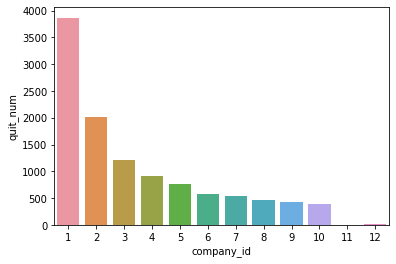

In [5]:
# 条形图的可视化
sns.barplot(x='company_id',y='quit_num',data=company)

Text(0.5, 1.0, 'Num_Quit/Company')

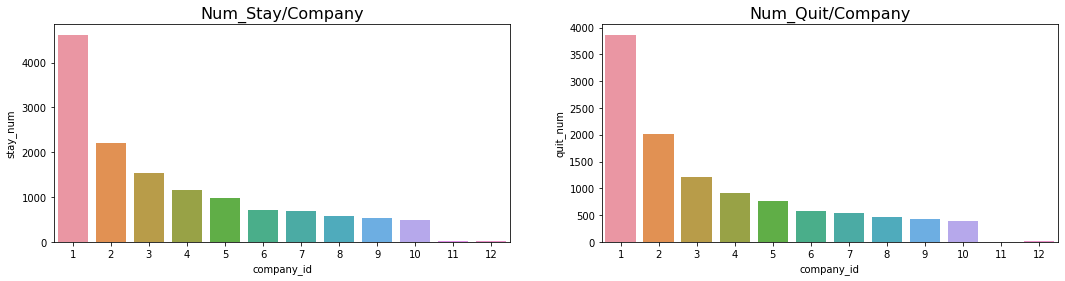

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
sns.barplot(x=company.company_id,y=company.stay_num, ax=ax[0])
ax[0].set_title('Num_Stay/Company', fontsize=16)
sns.barplot(x=company.company_id,y=company.quit_num, ax=ax[1])
ax[1].set_title('Num_Quit/Company', fontsize=16)


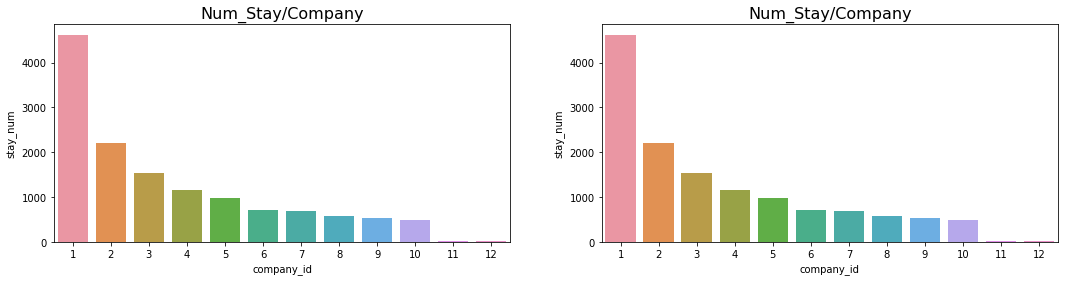

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
for a in ax:
    sns.barplot(x=company.company_id,y=company.stay_num, ax=a)
    a.set_title('Num_Stay/Company', fontsize=16)
    # sns.barplot(x=company.company_id,y=company.quit_num, ax=ax[1])
    # ax[1].set_title('Num_Quit/Company', fontsize=16)

# 频率直方图，判断数据分布

In [8]:
data_path='./Data/employee_retention.csv'
data=pd.read_csv(data_path)
data.sample(3)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
3634,97716.0,4,engineer,7,191000.0,2013-04-29,2015-05-08
18441,271391.0,7,engineer,25,186000.0,2011-06-06,2013-05-17
19129,335870.0,1,engineer,9,206000.0,2015-08-19,NaN


## 先判断数据缺失值情况

In [9]:
data.isnull().any()

employee_id    False
company_id     False
dept           False
seniority      False
salary         False
join_date      False
quit_date       True
dtype: bool

## 条形图
使用errorbar功能（差棒图）来估计变量之间的差值统计（置信区间）。需要提醒的是 barplot() 默认展示的是某种变量分布的平均值（可通过参数修改为 max、median 等）。

In [20]:
from collections import Counter

In [24]:
Counter(data['dept'])

Counter({'customer_service': 9180,
         'marketing': 3167,
         'data_science': 3190,
         'engineer': 4613,
         'sales': 3172,
         'design': 1380})

In [26]:
display(company.sample(3))
display(data.sample(3))

,company_id,quit_num,stay_num,overall_num,stay_frac,quit_frac
4,5,772,983,1755,0.560114,0.439886
6,7,532,692,1224,0.565359,0.434641
9,10,385,480,865,0.554913,0.445087


,employee_id,company_id,dept,seniority,salary,join_date,quit_date
7119,336608.0,10,customer_service,8,59000.0,2012-10-01,2015-07-10
22426,367728.0,9,customer_service,25,98000.0,2013-08-26,NaN
9425,802746.0,1,customer_service,13,65000.0,2014-11-17,NaN


# 浅学一下Pandas DataFrame表连接

In [29]:
# merge/join/concat
company_data=pd.merge(company,data)
company_data.sample(3)
company_data.to_csv('3-whole.csv')

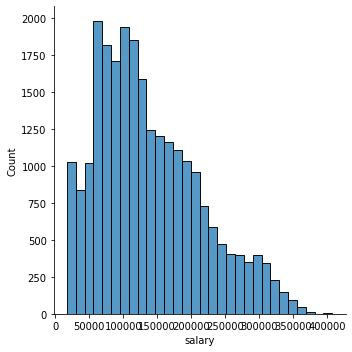

In [22]:
sns.displot(data.salary,bins=30)

In [32]:
company_data.columns

Index(['company_id', 'quit_num', 'stay_num', 'overall_num', 'stay_frac',
       'quit_frac', 'employee_id', 'dept', 'seniority', 'salary', 'join_date',
       'quit_date'],
      dtype='object')

In [60]:
company.columns

Index(['company_id', 'quit_num', 'stay_num', 'overall_num', 'stay_frac',
       'quit_frac'],
      dtype='object')

## 我终于找到报错原因了，这里ax返回的是nd_array()

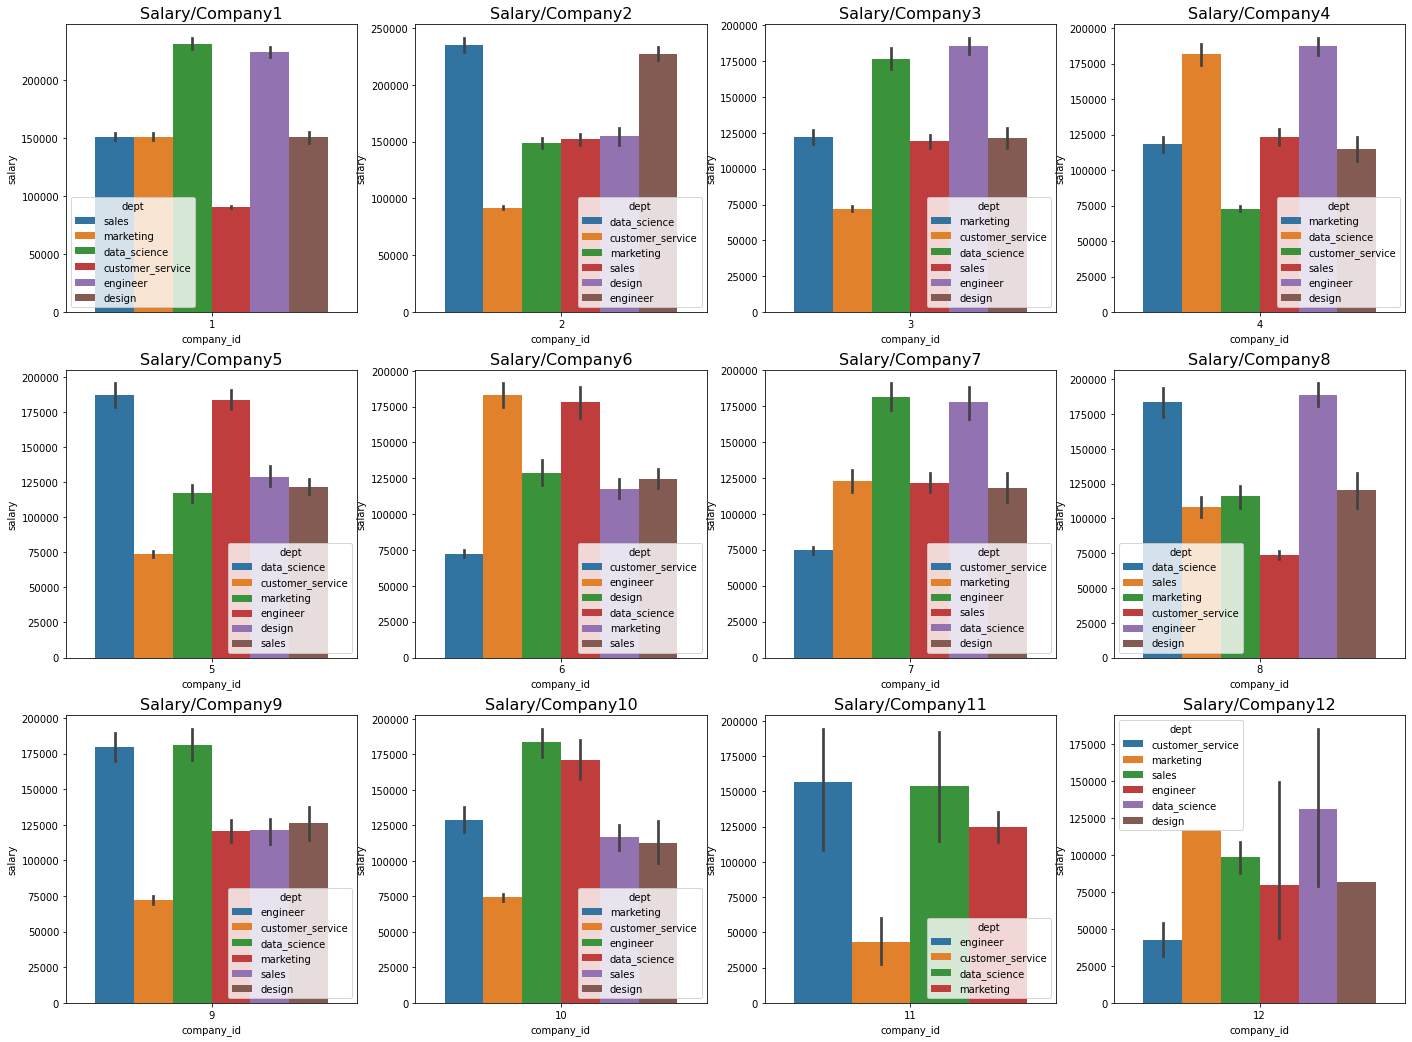

In [75]:
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
# for a in ax:
#     company=company[company['company_id']==1]
#     sns.barplot(x=company.company_id,y=company.stay_num, ax=a)
#     a.set_title('Num_Stay/Company', fontsize=16)
#     # sns.barplot(x=company.company_id,y=company.quit_num, ax=ax[1])
#     # ax[1].set_title('Num_Quit/Company', fontsize=16)
# fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(24, 18))
company_id_li=company_data['company_id'].unique()
id=0
for a  in ax.ravel():
    id=id+1
    data_tmp=company_data[company_data['company_id']==id]
    sns.barplot(x=data_tmp.company_id,y=data_tmp.salary, hue=data_tmp.dept,ax=a)
    a.set_title('Salary/Company{}'.format(id), fontsize=16)


<AxesSubplot:xlabel='company_id', ylabel='salary'>

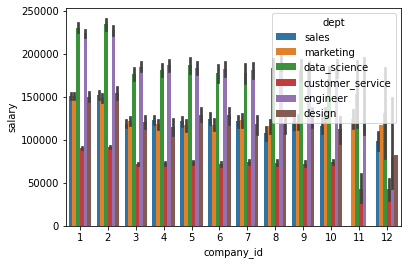

In [43]:
fig=plt.plot(18,6)
sns.barplot(x=company_data.company_id,y=company_data.salary,hue=company_data.dept)

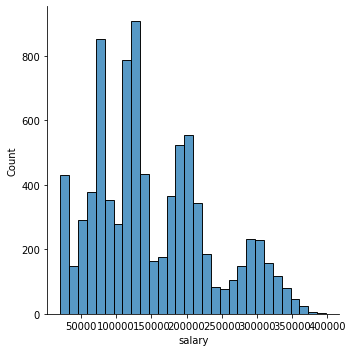

In [14]:
data_1=data[data['company_id']==1]
sns.displot(data_1.salary,bins=30)

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


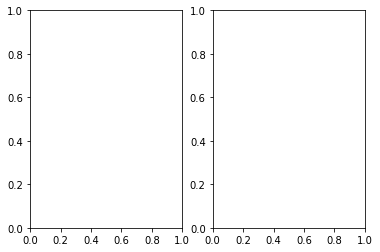

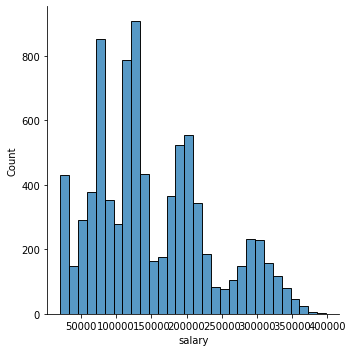

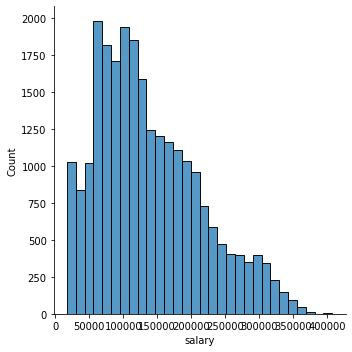

In [16]:
fig,axes=plt.subplots(1,2)
sns.displot(data_1.salary,bins=30,ax=axes[0])
sns.displot(data.salary,bins=30,ax=axes[1])


/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


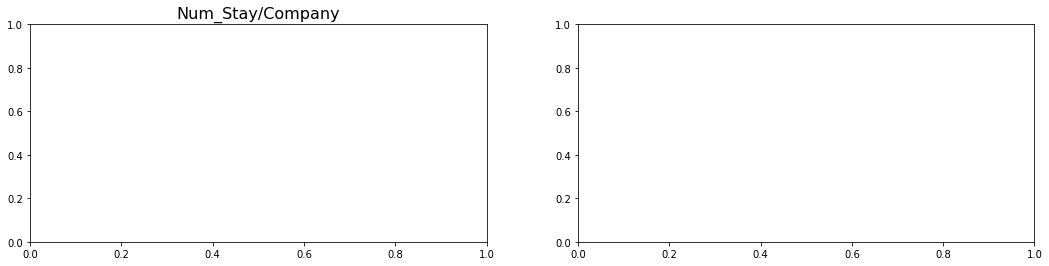

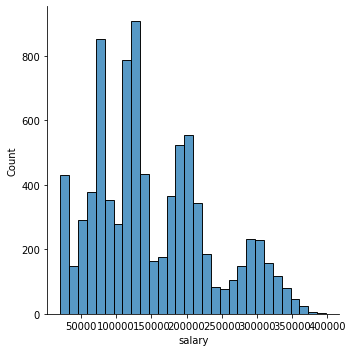

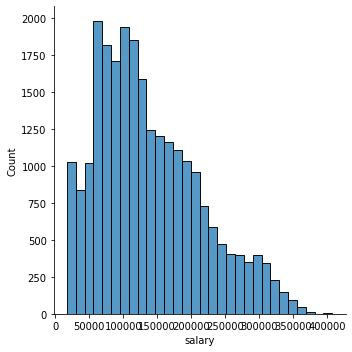

In [19]:
# 好像displot不可以诶
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
sns.displot(data_1.salary,bins=30,ax=axes[0])
ax[0].set_title('Num_Stay/Company', fontsize=16)
sns.displot(data.salary,bins=30,ax=axes[1])
